In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Loading mnist digits dataset

In [2]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

# Ploting some images

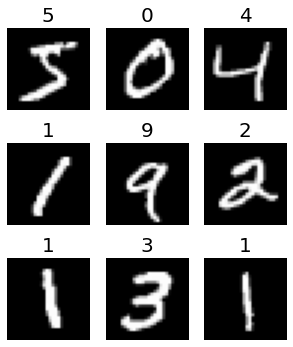

In [3]:
plt.figure(figsize=(5, 6))
for i in range(9): 
    plt.subplot(3, 3, i+1)
    plt.axis("off")
    plt.title(y_train[i], fontsize=20)
    plt.imshow(x_train[i], cmap="gray")

# Normalizing input

In [4]:
x_train[0][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
        90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [5]:
x_train = x_train/255.
x_test = x_test/255.

x_train[0][10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05490196,
       0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

# Reshaping to include channels

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape

(60000, 28, 28, 1)

# Creating model

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=5, padding="valid", strides=1, input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=32, kernel_size=5, padding="valid", strides=1),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [8]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = keras.optimizers.Adam(learning_rate=0.001) 
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

# Training model

In [9]:
batch_size = 64
epochs = 5

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True)

Epoch 1/5
938/938 [==============================] - 26s 27ms/step - loss: 0.1677 - accuracy: 0.9500
Epoch 2/5
938/938 [==============================] - 26s 27ms/step - loss: 0.0539 - accuracy: 0.9835
Epoch 3/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0369 - accuracy: 0.9883
Epoch 4/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0295 - accuracy: 0.99020s - loss:
Epoch 5/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0230 - accuracy: 0.9924


# Plotting learning curves

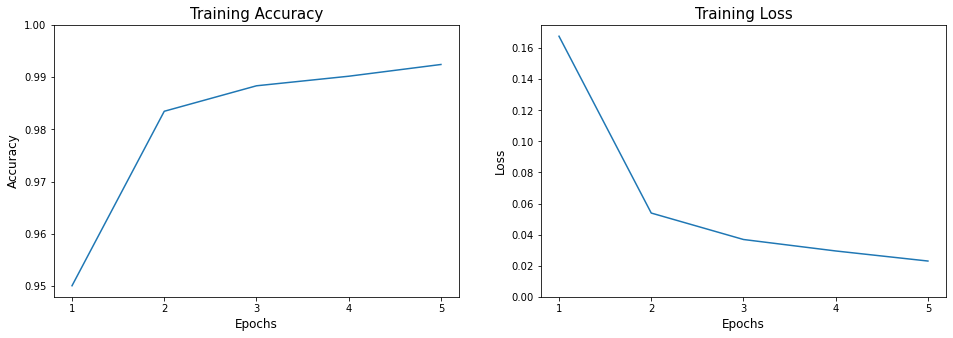

In [10]:
accuracy = history.history["accuracy"]
loss = history.history["loss"]
epochs = list(range(1, epochs+1))

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.title("Training Accuracy", fontsize=15)
plt.plot(epochs, accuracy)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.xticks(epochs)
plt.ylim([min(plt.ylim()), 1])

plt.subplot(1, 2, 2)
plt.title("Training Loss", fontsize=15)
plt.plot(epochs, loss)
plt.ylabel("Loss", fontsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.xticks(epochs)
plt.ylim([0, max(plt.ylim())])
plt.show()

# Evaluating model on test set

In [11]:
model.evaluate(x_test, y_test, batch_size=batch_size)

157/157 [==============================] - 1s 8ms/step - loss: 0.0464 - accuracy: 0.9874


[0.04644079878926277, 0.9873999953269958]